

## Convolutional Neural Networks

---

In this notebook, we train a CNN to classify images from the CIFAR-10 database.

### 1. Load CIFAR-10 Database

In [1]:
import tensorflow as tf
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.6)
session = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options,allow_soft_placement=True))

In [2]:
import keras
from keras.datasets import cifar10

# load the pre-shuffled train and test data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


### 2. Visualize the First 24 Training Images

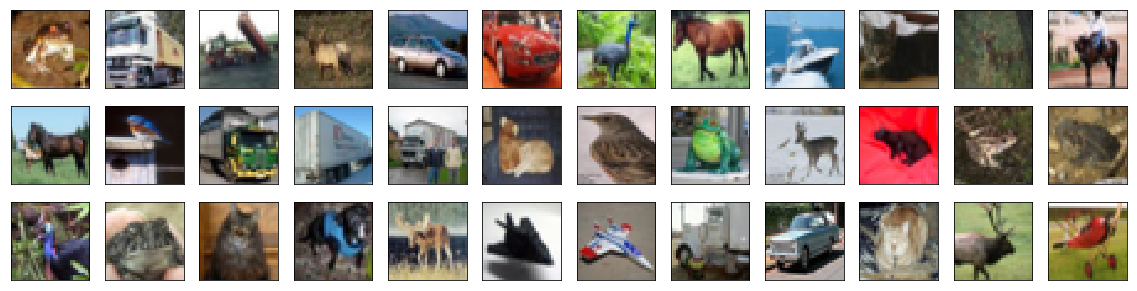

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

### 3. Rescale the Images by Dividing Every Pixel in Every Image by 255

In [4]:
# rescale [0,255] --> [0,1]
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

### 4.  Break Dataset into Training, Testing, and Validation Sets

In [5]:
from keras.utils import np_utils

# one-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# break training set into training and validation sets
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# print shape of training set
print('x_train shape:', x_train.shape)

# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

('x_train shape:', (45000, 32, 32, 3))
(45000, 'train samples')
(10000, 'test samples')
(5000, 'validation samples')


### 5. Define the Model Architecture 

In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', 
                        input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 16)        208       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 64)          0         
__________

### 6. Compile the Model 

In [7]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                  metrics=['accuracy'])

### 7. Train the Model 

In [8]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
hist = model.fit(x_train, y_train, batch_size=32, epochs=100,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/100
 - 10s - loss: 1.5560 - acc: 0.4372 - val_loss: 1.2838 - val_acc: 0.5362

Epoch 00001: val_loss improved from inf to 1.28375, saving model to model.weights.best.hdf5
Epoch 2/100
 - 8s - loss: 1.2493 - acc: 0.5523 - val_loss: 1.2038 - val_acc: 0.5754

Epoch 00002: val_loss improved from 1.28375 to 1.20383, saving model to model.weights.best.hdf5
Epoch 3/100
 - 8s - loss: 1.1314 - acc: 0.5986 - val_loss: 1.2180 - val_acc: 0.5730

Epoch 00003: val_loss did not improve from 1.20383
Epoch 4/100
 - 8s - loss: 1.0642 - acc: 0.6261 - val_loss: 1.0616 - val_acc: 0.6258

Epoch 00004: val_loss improved from 1.20383 to 1.06162, saving model to model.weights.best.hdf5
Epoch 5/100
 - 8s - loss: 1.0208 - acc: 0.6459 - val_loss: 1.0297 - val_acc: 0.6338

Epoch 00005: val_loss improved from 1.06162 to 1.02965, saving model to model.weights.best.hdf5
Epoch 6/100
 - 8s - loss: 1.0059 - acc: 0.6526 - val_loss: 0.9705 - val_acc: 0.6644

Epoch 000


Epoch 00058: val_loss did not improve from 0.96222
Epoch 59/100
 - 9s - loss: 1.6578 - acc: 0.4350 - val_loss: 1.5932 - val_acc: 0.4804

Epoch 00059: val_loss did not improve from 0.96222
Epoch 60/100
 - 9s - loss: 1.6713 - acc: 0.4312 - val_loss: 1.5316 - val_acc: 0.4634

Epoch 00060: val_loss did not improve from 0.96222
Epoch 61/100
 - 9s - loss: 1.6754 - acc: 0.4278 - val_loss: 2.0320 - val_acc: 0.3814

Epoch 00061: val_loss did not improve from 0.96222
Epoch 62/100
 - 8s - loss: 1.6845 - acc: 0.4203 - val_loss: 1.4015 - val_acc: 0.5122

Epoch 00062: val_loss did not improve from 0.96222
Epoch 63/100
 - 9s - loss: 1.6810 - acc: 0.4273 - val_loss: 1.5013 - val_acc: 0.4668

Epoch 00063: val_loss did not improve from 0.96222
Epoch 64/100
 - 9s - loss: 1.6957 - acc: 0.4182 - val_loss: 1.5385 - val_acc: 0.4824

Epoch 00064: val_loss did not improve from 0.96222
Epoch 65/100
 - 10s - loss: 1.6977 - acc: 0.4176 - val_loss: 2.2235 - val_acc: 0.3522

Epoch 00065: val_loss did not improve f

### 8. Load the Model with the Best Validation Accuracy

In [9]:
# load the weights that yielded the best validation accuracy
model.load_weights('model.weights.best.hdf5')

### 9. Calculate Classification Accuracy on Test Set

In [10]:
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])

('\n', 'Test accuracy:', 0.669)


### Modify the Model Architecture

In [18]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, AveragePooling2D

model = Sequential()
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', 
                        input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=128, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Conv2D(filters=256, kernel_size=2, padding='same', activation='relu'))
# model.add(MaxPooling2D(pool_size=2))
model.add(AveragePooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 32, 32, 64)        832       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 16, 16, 128)       32896     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
dropout_23 (Dropout)         (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 8, 8, 256)         131328    
_________________________________________________________________
average_pooling2d_2 (Average (None, 4, 4, 256)         0         
__________

In [19]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='adadelta', 
                  metrics=['accuracy'])
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best2.hdf5', verbose=1, 
                               save_best_only=True)
hist = model.fit(x_train, y_train, batch_size=128, epochs=50,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/50
 - 18s - loss: 1.9270 - acc: 0.2986 - val_loss: 1.6046 - val_acc: 0.4238

Epoch 00001: val_loss improved from inf to 1.60457, saving model to model.weights.best2.hdf5
Epoch 2/50
 - 17s - loss: 1.4851 - acc: 0.4666 - val_loss: 1.3031 - val_acc: 0.5424

Epoch 00002: val_loss improved from 1.60457 to 1.30308, saving model to model.weights.best2.hdf5
Epoch 3/50
 - 18s - loss: 1.2944 - acc: 0.5352 - val_loss: 1.1596 - val_acc: 0.5802

Epoch 00003: val_loss improved from 1.30308 to 1.15961, saving model to model.weights.best2.hdf5
Epoch 4/50
 - 18s - loss: 1.1583 - acc: 0.5879 - val_loss: 1.1341 - val_acc: 0.5976

Epoch 00004: val_loss improved from 1.15961 to 1.13410, saving model to model.weights.best2.hdf5
Epoch 5/50
 - 18s - loss: 1.0575 - acc: 0.6245 - val_loss: 0.9361 - val_acc: 0.6714

Epoch 00005: val_loss improved from 1.13410 to 0.93611, saving model to model.weights.best2.hdf5
Epoch 6/50
 - 18s - loss: 0.9704 - acc: 0.654

In [20]:
# load the weights that yielded the best validation accuracy
model.load_weights('model.weights.best2.hdf5')
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])

('\n', 'Test accuracy:', 0.7724)


### 10. Visualize Some Predictions

This may give you some insight into why the network is misclassifying certain objects.

In [21]:
# get predictions on the test set
y_hat = model.predict(x_test)

# define text labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

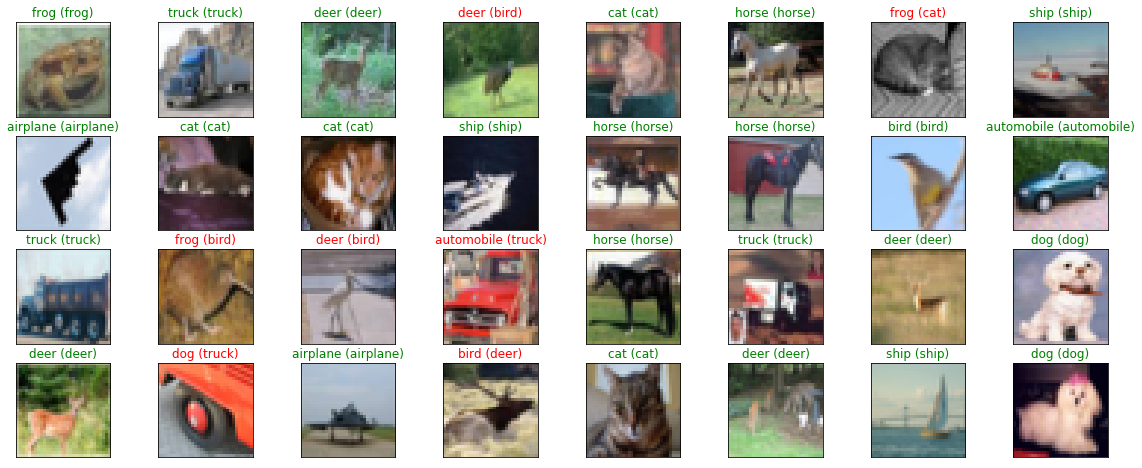

In [22]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))